### Задание
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Решение

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
# !pip install gmdhpy
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

### 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных  построение модели машинного обучения для решения или задачи регрессии.

В качестве набора данных возьмем набор с данными о фильмах и их характеристиках.
title	year	lifetime_gross	ratingInteger	ratingCount	duration	nrOfWins	nrOfNominations	nrOfPhotos	nrOfNewsArticles	nrOfUserReviews	nrOfGenre
Набор содержит такие колонки как:
- title - название
- year - год выхода
- lifetime_gross - сборы
- ratingInteger - рейтинг
- ratingCount - количество оценок
- duration - продолжительность
- nrOfWins - количество побед
- nrOfNominations - количество номинаций
- nrOfPhotos - количество фотографий
- nrOfNewsArticles - количество статей
- nrOfUserReviews - количество отзывов
- nrOfGenre - количество жанров

#### Поставим задачу предсказания количества оценок фильма  по данным характеристикам. Построим модель машинного обучения для данного набора и решим задачу регрессии.

### 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.


In [2]:
data = pd.read_csv('MACHINE_LEARNING_FINAL.csv', sep=',')
data.head()

,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
0,METROPOLIS,1927,1236166,8,81007,9180,3,4,67,428,376,2
1,CITY LIGHTS,1931,19181,9,70057,5220,2,0,38,187,186,3
2,MODERN TIMES,1936,163577,9,90847,5220,3,1,44,27,180,2
3,GONE WITH THE WIND,1939,198676459,8,160414,14280,10,6,143,1263,653,3
4,THE WIZARD OF OZ,1939,22342633,8,209506,6120,6,12,126,2363,477,3


In [3]:
data.shape

(3747, 12)

In [4]:
data.columns

Index(['title', 'year', 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre'],
      dtype='object')

In [5]:
data.isnull().sum() 

title               0
year                0
lifetime_gross      0
ratingInteger       0
ratingCount         0
duration            0
nrOfWins            0
nrOfNominations     0
nrOfPhotos          0
nrOfNewsArticles    0
nrOfUserReviews     0
nrOfGenre           0
dtype: int64

In [6]:
data.dtypes 

title               object
year                 int64
lifetime_gross       int64
ratingInteger        int64
ratingCount          int64
duration             int64
nrOfWins             int64
nrOfNominations      int64
nrOfPhotos           int64
nrOfNewsArticles     int64
nrOfUserReviews      int64
nrOfGenre            int64
dtype: object

In [7]:
data.describe()

,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
count,3747.000000,3.747000e+03,3747.000000,3.747000e+03,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,1998.083800,4.846733e+07,6.631972,7.094831e+04,6624.579664,5.405391,7.549239,45.380838,595.805978,275.285028,2.530825
std,11.544566,6.397511e+07,1.030435,1.016571e+05,1294.655800,11.616207,13.175695,39.408302,1436.967146,369.223015,0.664320
min,1921.000000,4.230000e+02,2.000000,5.300000e+01,2760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,8.402959e+06,6.000000,1.308850e+04,5760.000000,0.000000,0.000000,20.000000,42.000000,76.000000,2.000000
50%,2000.000000,2.783841e+07,7.000000,3.584800e+04,6360.000000,1.000000,3.000000,35.000000,154.000000,159.000000,3.000000
75%,2007.000000,6.144441e+07,7.000000,8.576500e+04,7200.000000,5.000000,9.000000,59.500000,547.000000,325.000000,3.000000
max,2017.000000,7.605076e+08,9.000000,1.183395e+06,16260.000000,137.000000,137.000000,394.000000,23660.000000,4928.000000,3.000000


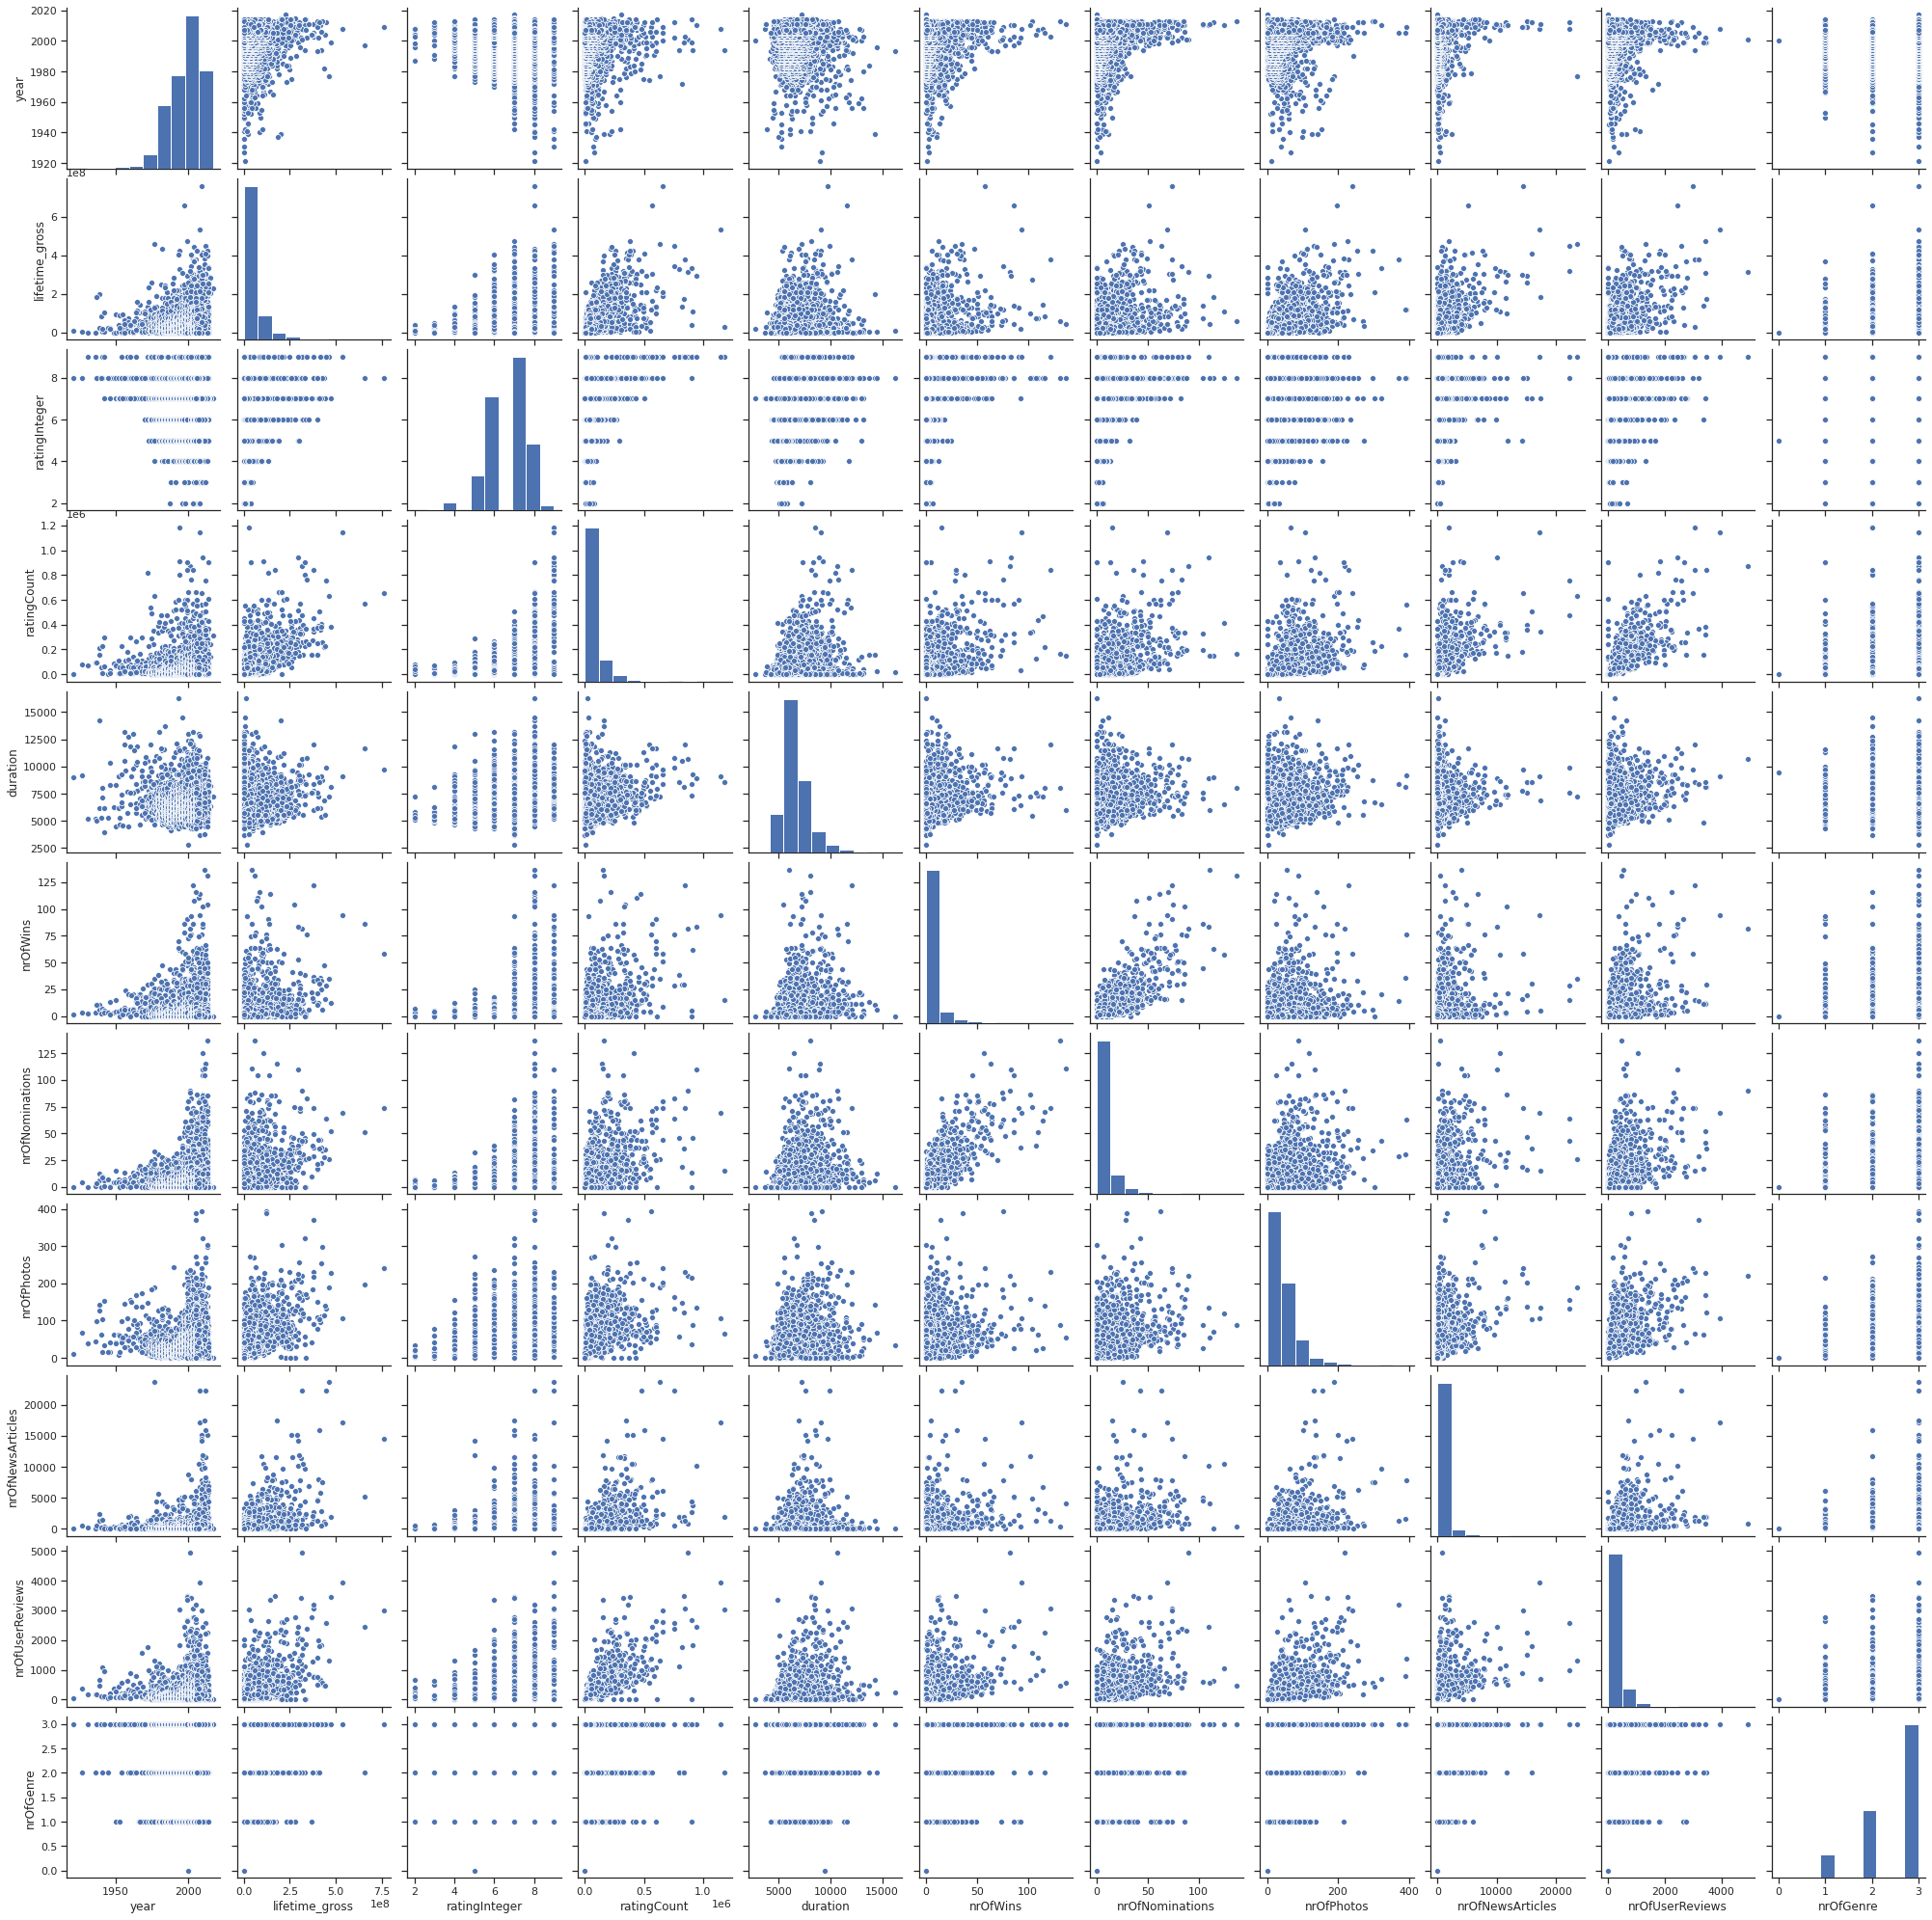

In [8]:
sns.pairplot(data)

Видим, что заметна корреляция таких характеристик как количество фото и количество отзывов.
В остальных случаях зависимости не такие очевидные.

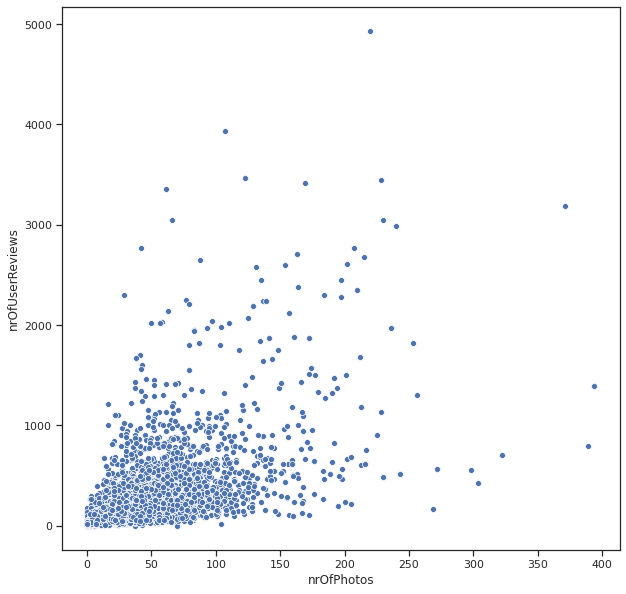

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='nrOfPhotos', y='nrOfUserReviews', data=data)

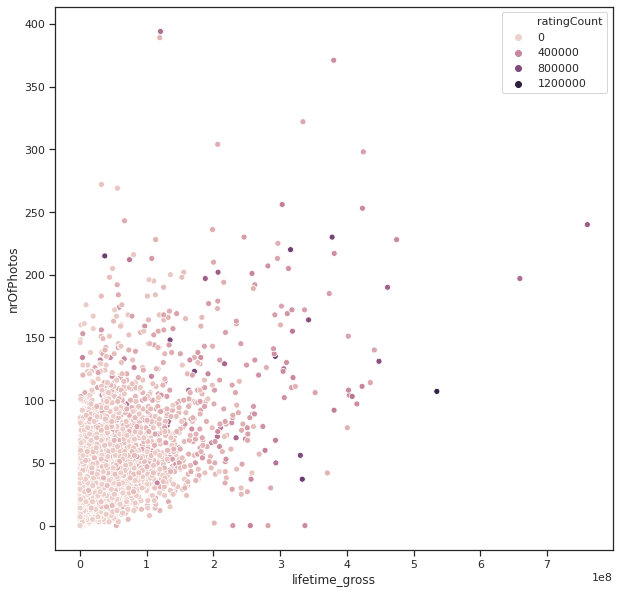

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='lifetime_gross', y='nrOfPhotos', data=data, hue='ratingCount')

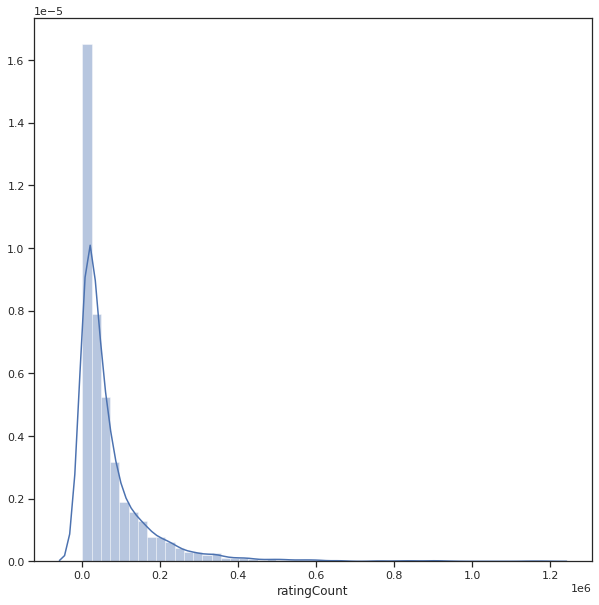

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['ratingCount'])

In [12]:
data.columns

Index(['title', 'year', 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre'],
      dtype='object')

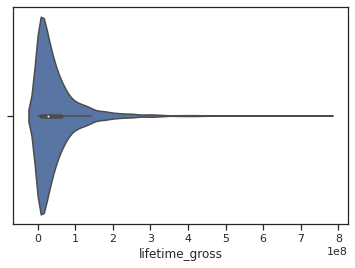

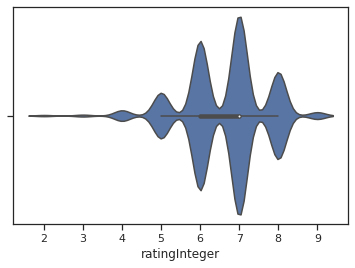

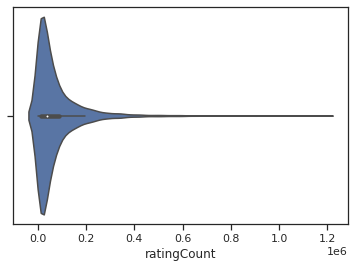

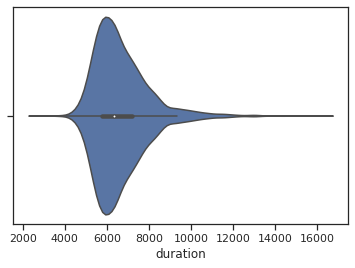

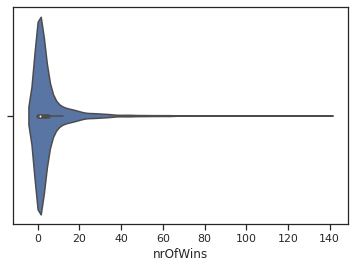

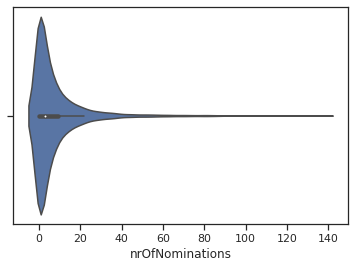

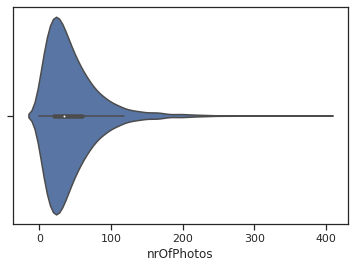

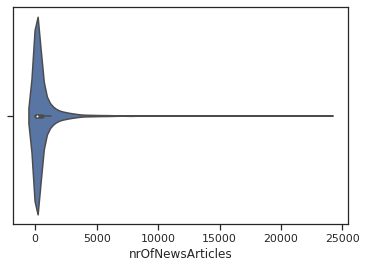

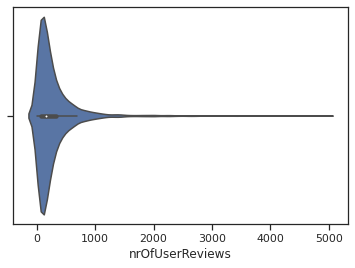

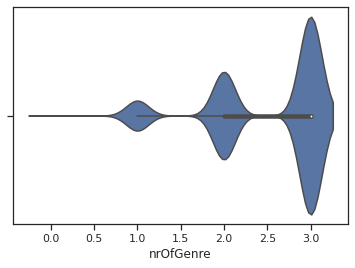

In [13]:
# Скрипичные диаграммы для числовых колонок
for col in [ 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre']:
    
    sns.violinplot(x=data[col])
    plt.show()

#### Анализ и заполнение пропусков в данных. 
Поскольку в данном наборе пустых значений нет, пропустим данный пункт.

### 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

#### Кодирование категориальных признаков числовыми

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['title'] = le.fit_transform(data['title'])
data.dtypes

title               int64
year                int64
lifetime_gross      int64
ratingInteger       int64
ratingCount         int64
duration            int64
nrOfWins            int64
nrOfNominations     int64
nrOfPhotos          int64
nrOfNewsArticles    int64
nrOfUserReviews     int64
nrOfGenre           int64
dtype: object

In [15]:
data.head()


,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
0,1761,1927,1236166,8,81007,9180,3,4,67,428,376,2
1,585,1931,19181,9,70057,5220,2,0,38,187,186,3
2,1797,1936,163577,9,90847,5220,3,1,44,27,180,2
3,1137,1939,198676459,8,160414,14280,10,6,143,1263,653,3
4,3370,1939,22342633,8,209506,6120,6,12,126,2363,477,3


#### Масштабирование данных. 

In [16]:
scale_cols = ['year','lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre']

In [17]:
data.columns

Index(['title', 'year', 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre'],
      dtype='object')

In [18]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [19]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]


In [20]:
data.head()

,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,lifetime_gross_scaled,ratingInteger_scaled,ratingCount_scaled,duration_scaled,nrOfWins_scaled,nrOfNominations_scaled,nrOfPhotos_scaled,nrOfNewsArticles_scaled,nrOfUserReviews_scaled,nrOfGenre_scaled
0,1761,1927,1236166,8,81007,9180,3,4,67,428,...,0.001625,0.857143,0.068411,0.475556,0.021898,0.029197,0.170051,0.018090,0.076299,0.666667
1,585,1931,19181,9,70057,5220,2,0,38,187,...,0.000025,1.000000,0.059158,0.182222,0.014599,0.000000,0.096447,0.007904,0.037744,1.000000
2,1797,1936,163577,9,90847,5220,3,1,44,27,...,0.000215,1.000000,0.076727,0.182222,0.021898,0.007299,0.111675,0.001141,0.036526,0.666667
3,1137,1939,198676459,8,160414,14280,10,6,143,1263,...,0.261241,0.857143,0.135515,0.853333,0.072993,0.043796,0.362944,0.053381,0.132508,1.000000
4,3370,1939,22342633,8,209506,6120,6,12,126,2363,...,0.029378,0.857143,0.177001,0.248889,0.043796,0.087591,0.319797,0.099873,0.096794,1.000000


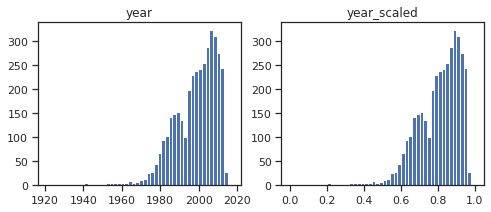

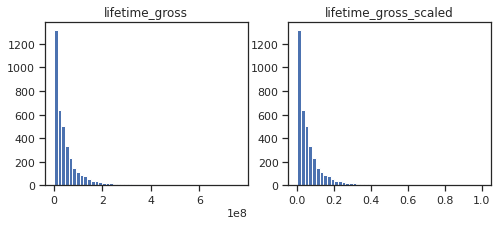

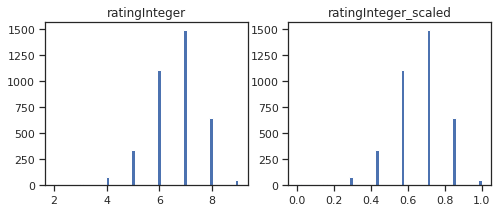

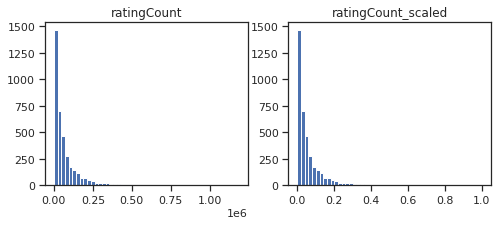

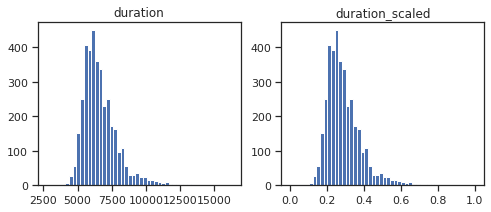

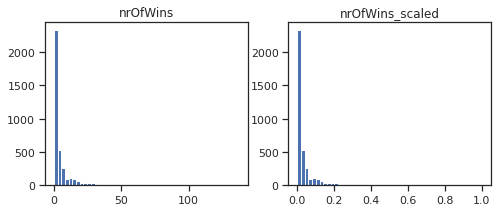

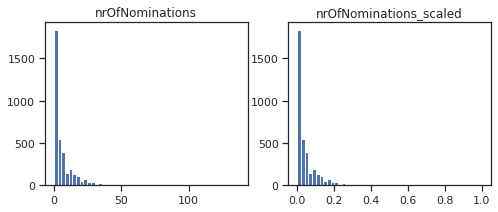

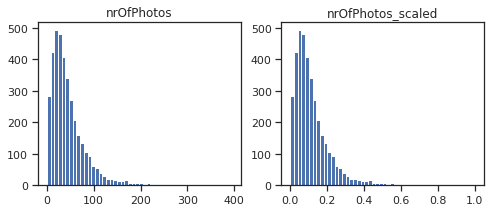

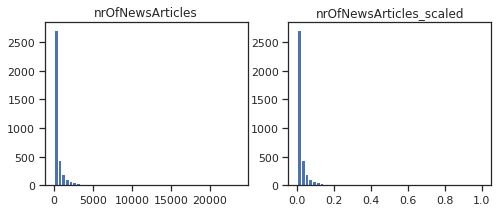

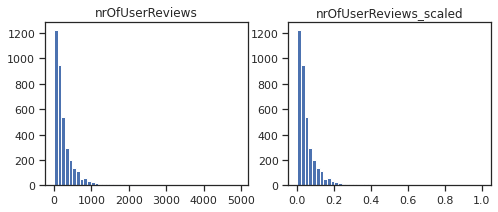

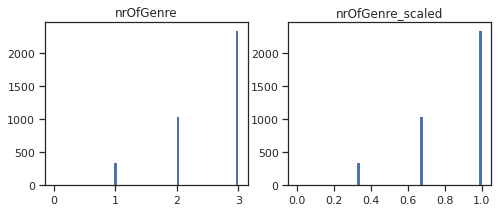

In [21]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [22]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols
corr_cols_1

['year',
 'lifetime_gross',
 'ratingInteger',
 'ratingCount',
 'duration',
 'nrOfWins',
 'nrOfNominations',
 'nrOfPhotos',
 'nrOfNewsArticles',
 'nrOfUserReviews',
 'nrOfGenre']

In [23]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['year_scaled',
 'lifetime_gross_scaled',
 'ratingInteger_scaled',
 'ratingCount_scaled',
 'duration_scaled',
 'nrOfWins_scaled',
 'nrOfNominations_scaled',
 'nrOfPhotos_scaled',
 'nrOfNewsArticles_scaled',
 'nrOfUserReviews_scaled',
 'nrOfGenre_scaled']

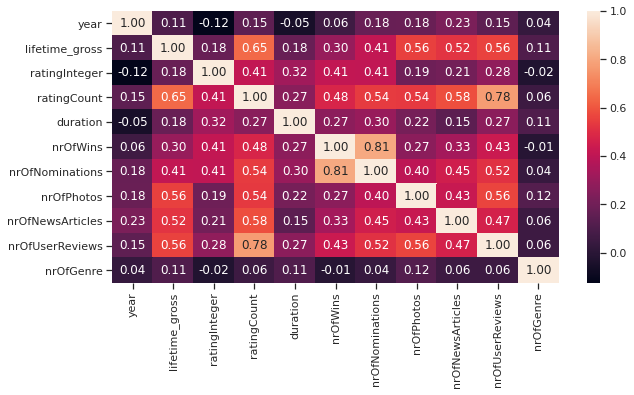

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

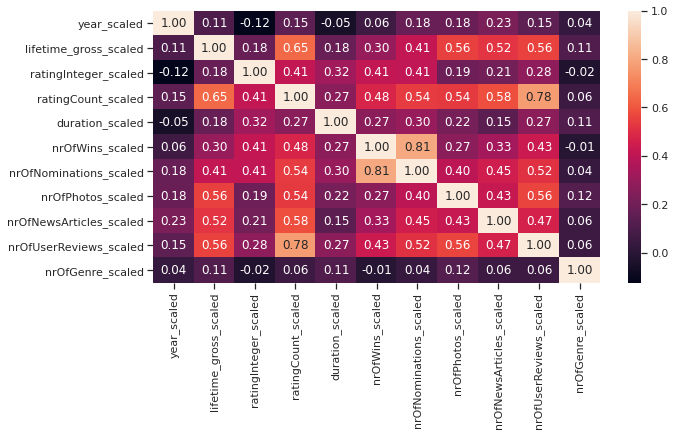

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

- Видим, что количество отзывов не сильно коррелирует с данными характеристиками. Наибольшее влияние на количество отзывов оказывает количество отзывов, что очень логично и сборы. 

### 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
Возьмем метрики MAE, Median Absolute Error и  R².
- MAE (Mean Absolute Error) — это среднее модуля ошибки. Данная метрика удобна, она не чувствительна к выбросам,  как MSE, показывает среднюю ошибку
- Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, менее чувствительна к воздействию промахов
- Коэффициент детерминации показывает, насколько модель соответствует или не соответствует данным.


In [26]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6. Выбор наиболее подходящих моделей для решения задачи  регрессии.
- Возьмем модели случайный лес и дерево решений, поскольку они показали оптимальные результаты.
- В качестве ансамблевой модели возьмем 'TREE+RF=>LR' модель

In [ ]:
### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [27]:
data_new = shuffle(data)
data_new

,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,lifetime_gross_scaled,ratingInteger_scaled,ratingCount_scaled,duration_scaled,nrOfWins_scaled,nrOfNominations_scaled,nrOfPhotos_scaled,nrOfNewsArticles_scaled,nrOfUserReviews_scaled,nrOfGenre_scaled
2037,1946,2013,89107235,7,244627,7440,0,0,48,2834,...,0.117168,0.714286,0.206681,0.346667,0.000000,0.000000,0.121827,0.119780,0.157468,1.000000
319,3550,1985,12993175,6,5326,6420,0,0,6,51,...,0.017084,0.571429,0.004456,0.271111,0.000000,0.000000,0.015228,0.002156,0.013393,1.000000
1189,2890,1993,183875760,8,177341,7800,12,23,56,418,...,0.241780,0.857143,0.149820,0.373333,0.087591,0.167883,0.142132,0.017667,0.051136,1.000000
197,730,2007,8580428,7,74812,5400,2,0,16,455,...,0.011282,0.714286,0.063176,0.195556,0.014599,0.000000,0.040609,0.019231,0.038555,0.333333
1907,1329,2011,73864507,8,192078,7560,45,104,88,4508,...,0.097125,0.857143,0.162273,0.355556,0.328467,0.759124,0.223350,0.190533,0.124594,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,1301,2011,117538559,7,257383,5880,2,7,59,3413,...,0.154552,0.714286,0.217460,0.231111,0.014599,0.051095,0.149746,0.144252,0.071429,0.666667
2540,3112,1979,65200000,8,21409,5700,3,9,41,271,...,0.085732,0.857143,0.018047,0.217778,0.021898,0.065693,0.104061,0.011454,0.017857,1.000000
1962,1102,2008,2430627,7,17740,10980,7,16,14,593,...,0.003196,0.714286,0.014947,0.608889,0.051095,0.116788,0.035533,0.025063,0.039164,1.000000
816,1217,2004,249541069,8,278537,8520,13,35,128,700,...,0.328124,0.857143,0.235337,0.426667,0.094891,0.255474,0.324873,0.029586,0.300122,1.000000


In [28]:
len(data_new)

3747

In [29]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки
train_data_all = data_new[:2700]
test_data_all = data_new[2701:]
train_data_all.shape, test_data_all.shape

((2700, 23), (1046, 23))

In [30]:
data.columns

Index(['title', 'year', 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre', 'year_scaled',
       'lifetime_gross_scaled', 'ratingInteger_scaled', 'ratingCount_scaled',
       'duration_scaled', 'nrOfWins_scaled', 'nrOfNominations_scaled',
       'nrOfPhotos_scaled', 'nrOfNewsArticles_scaled',
       'nrOfUserReviews_scaled', 'nrOfGenre_scaled'],
      dtype='object')

In [31]:
# Признаки для задачи регресии (опустим название)
task_regr_cols = ['title', 'year', 'lifetime_gross', 'ratingInteger', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre', 'year_scaled',
       'lifetime_gross_scaled', 'ratingInteger_scaled', 'ratingCount_scaled',
       'duration_scaled', 'nrOfWins_scaled', 'nrOfNominations_scaled',
       'nrOfPhotos_scaled', 'nrOfNewsArticles_scaled',
       'nrOfUserReviews_scaled', 'nrOfGenre_scaled']

In [32]:
# Выборки для задачи регресии
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['ratingCount']
regr_Y_test = test_data_all['ratingCount']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((2700, 23), (1046, 23), (2700,), (1046,))

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [67]:
# Модели
regr_models = {'Tree':DecisionTreeRegressor(max_depth=8),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

In [68]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [69]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    medae = median_absolute_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [70]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(max_depth=8)

MAE=774.395, MedAE=289.652, R2=0.999
*****************************************************
*****************************************************
RandomForestRegressor(max_depth=10, n_estimators=30)

MAE=553.334, MedAE=40.242, R2=0.995
*****************************************************


#### Ансамблевая модель

In [92]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# набор данных
dataset = Dataset(regr_X_train, regr_Y_train, regr_X_test)
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':5},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


results = stacker.validate(k=10,scorer=median_absolute_error)



Metric: mean_absolute_error
Folds accuracy: [1045.970386774904, 930.0459954195503, 1129.0613392772195, 1361.2623884771958, 1406.1153513280067, 1145.938476361386, 980.0840981919788, 2259.7370478803523, 920.4161867116387, 946.7109548967269]
Mean accuracy: 1212.534222531896
Standard Deviation: 385.3830977674812
Variance: 148520.13204486
Metric: median_absolute_error
Folds accuracy: [522.3984805439368, 586.2014349209421, 645.6072837976562, 890.6085993079942, 625.924265548414, 736.8923864693106, 664.2805063108499, 547.7621691388758, 685.2869982277662, 605.0121905217329]
Mean accuracy: 650.9974314787479
Standard Deviation: 100.15476023417993
Variance: 10030.97599756607


### 9. Подбор гиперпараметров для выбранных моделей. 

#### Случайный лес

In [90]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
n_range = np.array(range(0,50,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [74]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(regr_X_train, regr_Y_train)

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fi

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/denis/ml/env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fi

CPU times: user 1min 15s, sys: 282 ms, total: 1min 16s
Wall time: 1min 16s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}],
             scoring='neg_mean_squared_error')

In [75]:
# Лучшая модель
rf_gs.best_estimator_

RandomForestRegressor(max_depth=45)

In [76]:
# Лучшее значение параметров
rf_gs.best_params_

{'max_depth': 45}

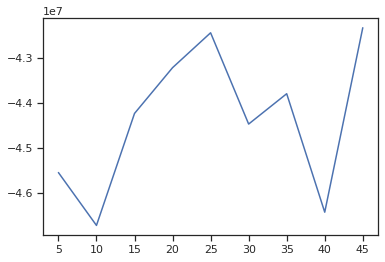

In [44]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

#### Дерево

In [45]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [46]:
n_range = np.array(range(0,50,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [47]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(regr_X_train, regr_Y_train)

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

CPU times: user 1.42 s, sys: 85 µs, total: 1.42 s
Wall time: 1.42 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}],
             scoring='neg_mean_squared_error')

In [48]:
# Лучшая модель
dt_gs.best_estimator_

DecisionTreeRegressor(max_depth=20)

In [49]:
# Лучшее значение параметров
dt_gs.best_params_

{'max_depth': 20}

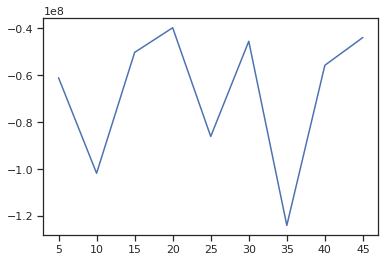

In [50]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

#### Ансамблевая модель

#### Decision tree

In [51]:
n_range = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}]

In [52]:
%%time
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(regr_X_train, regr_Y_train)

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_

CPU times: user 1.19 s, sys: 4.06 ms, total: 1.19 s
Wall time: 1.18 s


/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}],
             scoring='neg_mean_squared_error')

In [53]:
# Лучшая модель
ens_dt_gs.best_estimator_

DecisionTreeRegressor(min_impurity_split=0.5)

In [54]:
# Лучшее значение параметров
ens_dt_gs.best_params_

{'min_impurity_split': 0.5}

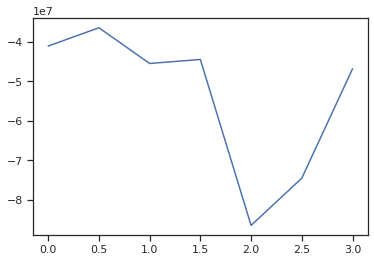

In [55]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

##### Random Forest

In [56]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [57]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 19.9 s, sys: 11.9 ms, total: 19.9 s
Wall time: 19.9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}],
             scoring='neg_mean_squared_error')

In [58]:
# Лучшая модель
ens_rf_gs.best_estimator_

RandomForestRegressor(n_estimators=60)

In [59]:
# Лучшее значение параметров
ens_rf_gs.best_params_

{'n_estimators': 60}

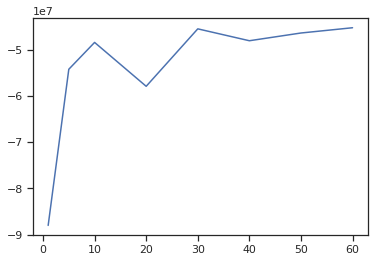

In [60]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

### 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [77]:
regr_models_grid = {'Tree':dt_gs.best_estimator_,
                   'RF': rf_gs.best_estimator_
                   }

In [78]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(max_depth=20)

MAE=774.803, MedAE=51.0, R2=0.994
*****************************************************
*****************************************************
RandomForestRegressor(max_depth=45)

MAE=565.89, MedAE=28.655, R2=0.994
*****************************************************


Удалось немного улучшить обе модели по метрике MedAE

#### Ансамблевый метод

In [81]:
# # # Возьмем лучшую модель: 'TREE+RF=>LR'
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':0.5,
                                  'max_depth':20},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)


/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_

In [88]:
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [598.6504086055367, 685.3752156309035, 741.8975437612055, 856.7357771226596, 1002.4279556690457, 1002.6587996957129, 684.795699844793, 1304.5601993068835, 560.7006745943086, 586.705642114385]
Mean accuracy: 802.4507916345435
Standard Deviation: 226.4673533318827
Variance: 51287.462125147795
Metric: median_absolute_error
Folds accuracy: [312.080033205013, 398.24598507362225, 405.3395872823876, 326.4411948100915, 407.28757818367376, 460.2302360872145, 438.0417146439913, 62.52175403803267, 388.8264976380815, 363.7897959108768]
Mean accuracy: 356.2804376872985
Standard Deviation: 107.01119547762202
Variance: 11451.395957549832


Удалось добиться небольшого улучшения.

### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [83]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

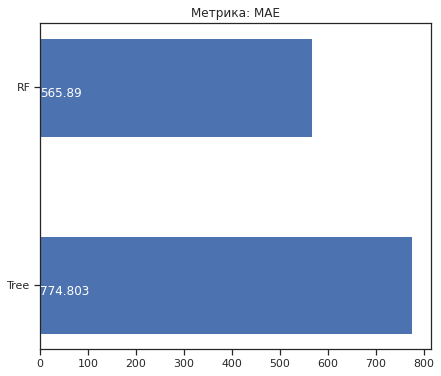

In [84]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль - 802.45

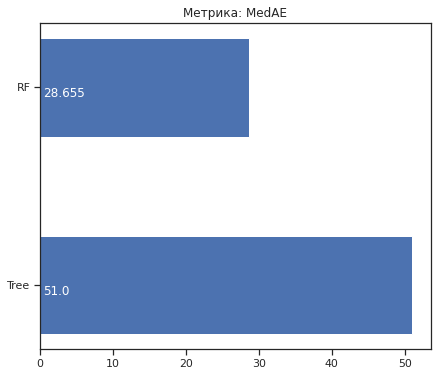

In [85]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль - 356.28

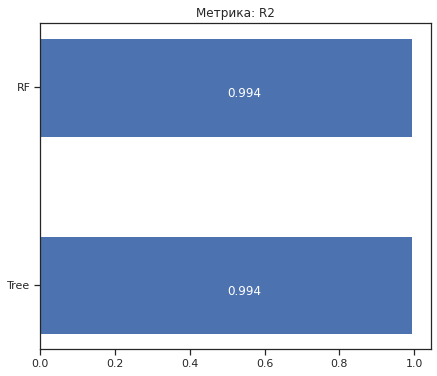

In [87]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))


### Вывод:
По возрастанию ошибки модели распределились следующим образом:
1. случайный лес
2. дерево решений
3. ансамблевая модель
